In [1]:
%matplotlib inline

In [4]:
import os
from PIL import Image
os.chdir("/home/jonathan/ubc/capstone/orthophoto/2014")

img = Image.open("483E_5454N.tif")
print(img.size)
img = img.resize((2000,2000), Image.ANTIALIAS)
img.save("483E_5454N_scaled.jpg",quality=85)

/home/jonathan/.local/lib/python3.6/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


(10000, 10000)


<class 'numpy.ndarray'>
Felzenszwalb number of segments: 13773
SLIC number of segments: 135
Quickshift number of segments: 17078


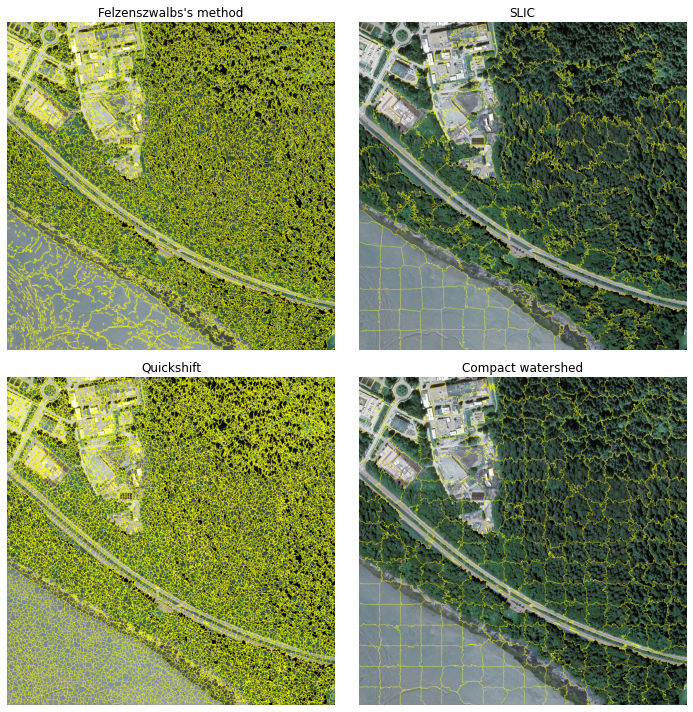

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import cv2
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

os.chdir("/home/jonathan/ubc/capstone/orthophoto/2014")

img = img_as_float(cv2.imread("483E_5454N_scaled.jpg"))

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1,
                     start_label=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)
print(type(segments_watershed))

print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import gdal 
import matplotlib.pyplot as plt 
  

os.chdir("/home/jonathan/ubc/capstone/orthophoto/2014")

dataset = gdal.Open("483E_5454N.tif")


print(dataset.RasterCount)


#print(img.shape )

3


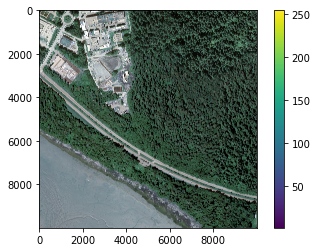

In [7]:
img = cv2.imread('483E_5454N.tif', cv2.IMREAD_UNCHANGED)

fig, ax = plt.subplots()
im = ax.imshow(img)
fig.colorbar(im)
plt.show()